In [1]:
import numpy as np

In [2]:
input_data=np.load("CK+dataset.npy")
label=np.load("CK+label.npy")

In [3]:
label=label-1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import numpy as np
import time
from copy import deepcopy
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
input_data=torch.FloatTensor(input_data)
label=torch.LongTensor(label)

In [6]:
remake=input_data.unsqueeze(0)
remake=remake.transpose(0,1)

In [7]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
dataset = TensorDataset(remake,label)

In [8]:
trainset,valset=torch.utils.data.random_split(dataset,[277,50])
trainset,testset=torch.utils.data.random_split(trainset,[227,50])

partition={'train':trainset,'val':valset,'test':testset}

In [9]:
import collections

In [10]:
y_test = [y for _, y in trainset]
y_val = [y for _, y in valset]

In [11]:
y_test=np.array(y_test)
y_val=np.array(y_val)

In [12]:
counter_test = collections.Counter(y_test)
counter_val = collections.Counter(y_val)
print(counter_test)
print(counter_val)

Counter({6: 61, 4: 52, 2: 33, 0: 33, 5: 18, 3: 17, 1: 13})
Counter({2: 17, 6: 11, 4: 9, 0: 5, 5: 4, 1: 2, 3: 2})


image indices: [172  47 117 192  67 195 103   9]
torch.Size([3, 1283, 1925])


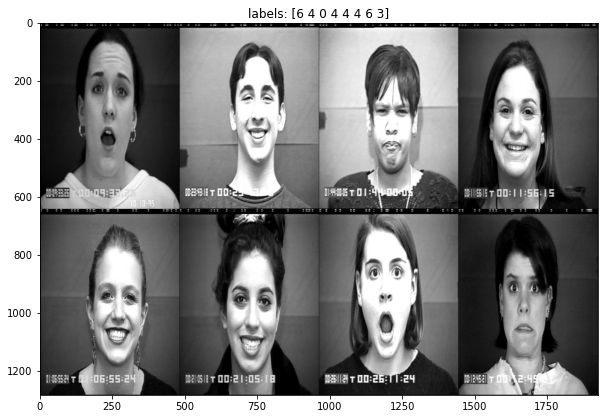

In [14]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(0)

# define helper function
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))

    plt.imshow(npimg_tr)
    if y is not None:
        plt.title('labels: ' + str(np.array(y)))

# pick random samples
grid_size = 8
rnd_inds = np.random.randint(0, len(trainset), grid_size)
print('image indices:', rnd_inds)

# create a grid from the sample images
x_grid = [trainset[i][0] for i in rnd_inds]
y_grid = [trainset[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=1)
print(x_grid.shape)

plt.figure(figsize=(10.0, 10.0))
show(x_grid, y_grid)